In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Data.xlsx', usecols=[1,2,3,4,6,7,8,9,10,11,13,25,26,27,28], names=["ID_litter","Sex","Group","Breed_size","Litter_size","Dead","Dead_age","Diarr_1m","Diarr_2m","Dam_sep","Weight_D1","IgG_dam","Age_dam","IgG_milk_mean","IgG_D2"])
df.head()

,ID_litter,Sex,Group,Breed_size,Litter_size,Dead,Dead_age,Diarr_1m,Diarr_2m,Dam_sep,Weight_D1,IgG_dam,Age_dam,IgG_milk_mean,IgG_D2
0,10L,M,EL,S,1,1,1.0,0,0,NaN,223,8.412161,6,23.842138,NaN
1,11L,M,OO,S,6,0,NaN,1,0,9.0,167,6.001322,3,25.937648,5.480288
2,11L,F,OL,S,6,0,NaN,1,0,9.0,165,6.001322,3,25.937648,1.908716
3,11L,F,OO,S,6,1,2.0,0,0,NaN,182,6.001322,3,25.937648,NaN
4,11L,F,OL,S,6,1,5.0,0,0,NaN,178,6.001322,3,25.937648,1.281405


In [3]:
df.head()

,ID_litter,Sex,Group,Breed_size,Litter_size,Dead,Dead_age,Diarr_1m,Diarr_2m,Dam_sep,Weight_D1,IgG_dam,Age_dam,IgG_milk_mean,IgG_D2
0,10L,M,EL,S,1,1,1.0,0,0,NaN,223,8.412161,6,23.842138,NaN
1,11L,M,OO,S,6,0,NaN,1,0,9.0,167,6.001322,3,25.937648,5.480288
2,11L,F,OL,S,6,0,NaN,1,0,9.0,165,6.001322,3,25.937648,1.908716
3,11L,F,OO,S,6,1,2.0,0,0,NaN,182,6.001322,3,25.937648,NaN
4,11L,F,OL,S,6,1,5.0,0,0,NaN,178,6.001322,3,25.937648,1.281405


In [4]:
len(df.columns)

15

In [5]:
sum(df.isnull().values.ravel())

192

In [6]:
print('NaN occurrences in Columns:')
print(df.isnull().sum(axis = 0))

NaN occurrences in Columns:
ID_litter          0
Sex                0
Group              0
Breed_size         0
Litter_size        0
Dead               0
Dead_age         125
Diarr_1m           0
Diarr_2m           0
Dam_sep           44
Weight_D1          0
IgG_dam            0
Age_dam            0
IgG_milk_mean      5
IgG_D2            18
dtype: int64


In [7]:
print('NaN occurrences in Rows:')
print(df.isnull().sum(axis = 1))

NaN occurrences in Rows:
0      2
1      1
2      1
3      2
4      1
      ..
164    1
165    1
166    1
167    1
168    1
Length: 169, dtype: int64


In [8]:
df.replace('X',np.NaN,inplace=True)
df.replace('x',np.NaN,inplace=True)
df.replace('?',np.NaN,inplace=True)

In [9]:
df.dtypes

ID_litter         object
Sex               object
Group             object
Breed_size        object
Litter_size        int64
Dead               int64
Dead_age         float64
Diarr_1m           int64
Diarr_2m           int64
Dam_sep          float64
Weight_D1          int64
IgG_dam          float64
Age_dam            int64
IgG_milk_mean    float64
IgG_D2           float64
dtype: object

On rend catégoriques les variables qui sont de type object comme l'ID de la portée, le sexe, le groupe, la taille de la race et la taille de la portée.

In [10]:
df['ID_litter']=pd.Categorical(df['ID_litter'],ordered=False)
df['Sex']=pd.Categorical(df['Sex'],ordered=False)
df['Group']=pd.Categorical(df['Group'],ordered=False)
df['Breed_size']=pd.Categorical(df['Breed_size'],ordered=False)

In [11]:
df.dtypes

ID_litter        category
Sex              category
Group            category
Breed_size       category
Litter_size         int64
Dead                int64
Dead_age          float64
Diarr_1m            int64
Diarr_2m            int64
Dam_sep           float64
Weight_D1           int64
IgG_dam           float64
Age_dam             int64
IgG_milk_mean     float64
IgG_D2            float64
dtype: object

In [12]:
first_column = df.pop('Dead') 
df.insert(0, 'Dead', first_column) 
df.head()

,Dead,ID_litter,Sex,Group,Breed_size,Litter_size,Dead_age,Diarr_1m,Diarr_2m,Dam_sep,Weight_D1,IgG_dam,Age_dam,IgG_milk_mean,IgG_D2
0,1,10L,M,EL,S,1,1.0,0,0,NaN,223,8.412161,6,23.842138,NaN
1,0,11L,M,OO,S,6,NaN,1,0,9.0,167,6.001322,3,25.937648,5.480288
2,0,11L,F,OL,S,6,NaN,1,0,9.0,165,6.001322,3,25.937648,1.908716
3,1,11L,F,OO,S,6,2.0,0,0,NaN,182,6.001322,3,25.937648,NaN
4,1,11L,F,OL,S,6,5.0,0,0,NaN,178,6.001322,3,25.937648,1.281405


In [13]:
# Chiots de petite race
df_S = df[df['Breed_size']=='S']
# Chiots de grande race
df_L = df[df['Breed_size']=='L']

Text(0.5, 1.0, 'Chiots de race de petite taille morts et vivants suivant leur poids à la naissance')

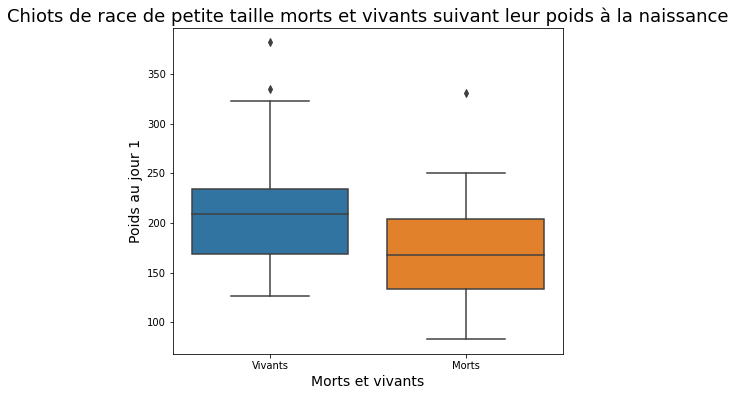

In [14]:
plt.figure(figsize=(7, 6)) 
sns.boxplot(x='Dead', 
            y='Weight_D1', 
            data=df_S) 
plt.ylabel("Poids au jour 1", size=14) 
plt.xlabel("Morts et vivants", size=14)
plt.xticks(np.arange(2), ['Vivants', 'Morts'])
plt.title("Chiots de race de petite taille morts et vivants suivant leur poids à la naissance", size=18)

Text(0.5, 1.0, 'Chiots de race de grande taille morts et vivants suivant leur poids à la naissance')

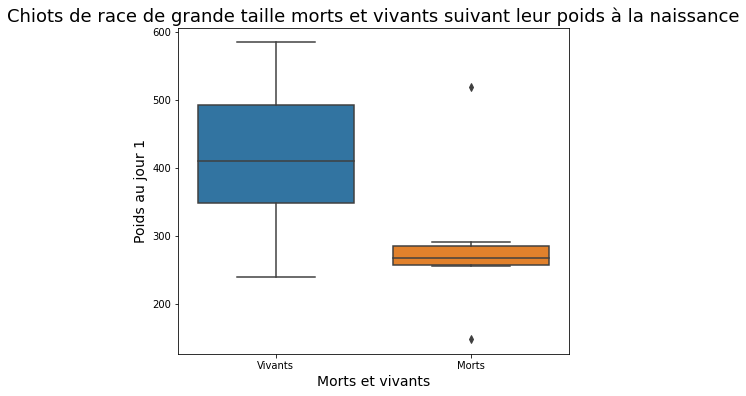

In [15]:
plt.figure(figsize=(7, 6)) 
sns.boxplot(x='Dead', 
            y='Weight_D1', 
            data=df_L) 
plt.ylabel("Poids au jour 1", size=14) 
plt.xlabel("Morts et vivants", size=14) 
plt.xticks(np.arange(2), ['Vivants', 'Morts'])
plt.title("Chiots de race de grande taille morts et vivants suivant leur poids à la naissance", size=18)

Text(0.5, 1.0, 'Chiots de race de petite taille morts et vivants suivant la taille de la portée')

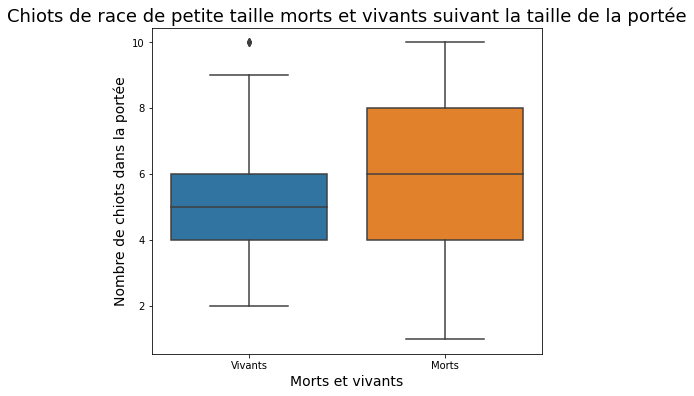

In [16]:
plt.figure(figsize=(7, 6)) 
sns.boxplot(x='Dead', 
            y='Litter_size', 
            data=df_S) 
plt.xlabel("Morts et vivants", size=14) 
plt.ylabel("Nombre de chiots dans la portée", size=14) 
plt.xticks(np.arange(2), ['Vivants', 'Morts'])
plt.title("Chiots de race de petite taille morts et vivants suivant la taille de la portée", size=18)

Text(0.5, 1.0, "Chiots morts et vivants suivant le taux d'IgG")

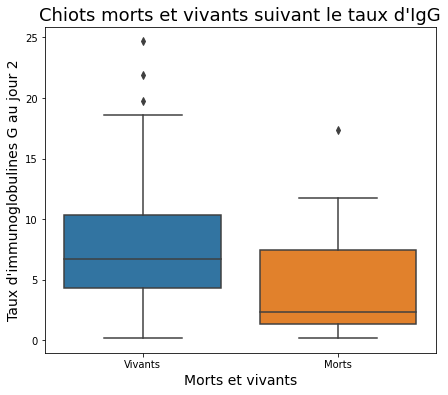

In [18]:
plt.figure(figsize=(7, 6)) 
sns.boxplot(x='Dead', 
            y='IgG_D2', 
            data=df) 
plt.xlabel("Morts et vivants", size=14) 
plt.ylabel("Taux d'immunoglobulines G au jour 2", size=14) 
plt.xticks(np.arange(2), ['Vivants', 'Morts'])
plt.title("Chiots morts et vivants suivant le taux d'IgG", size=18)

# Feature Selection

In [20]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [21]:
X = df[['Diarr_1m','Weight_D1','IgG_dam','IgG_D2']]
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Filter

### Pearson

In [22]:
from scipy.stats import pearsonr

In [23]:
X = df['Weight_D1']
y = df['Dead']
corr, p_value = pearsonr(X, y)
print(corr)
print(p_value)

-0.3529946301792001
2.5101476743455673e-06


In [24]:
X = df['Diarr_1m']
y = df['Dead']
corr, p_value = pearsonr(X, y)
print(corr)
print(p_value)

-0.23666645280993412
0.001948561642834569


In [25]:
pearson_matrix= df.corr(method='pearson')
pearson_matrix

,Dead,Litter_size,Dead_age,Diarr_1m,Diarr_2m,Dam_sep,Weight_D1,IgG_dam,Age_dam,IgG_milk_mean,IgG_D2
Dead,1.000000,0.163666,NaN,-0.236666,-0.164117,NaN,-0.352995,0.201954,0.031035,0.080200,-0.244929
Litter_size,0.163666,1.000000,0.105537,0.114893,0.034929,-0.062712,-0.083059,0.214169,-0.285673,0.174631,-0.054622
Dead_age,NaN,0.105537,1.000000,0.318591,0.511943,NaN,0.372919,0.254431,-0.218820,0.148998,0.500774
Diarr_1m,-0.236666,0.114893,0.318591,1.000000,0.126734,0.003870,0.088812,-0.053996,-0.388995,0.211924,-0.067444
Diarr_2m,-0.164117,0.034929,0.511943,0.126734,1.000000,-0.017193,0.157188,0.110235,-0.317449,0.055625,0.275860
Dam_sep,NaN,-0.062712,NaN,0.003870,-0.017193,1.000000,-0.701144,-0.065068,-0.037067,0.434010,-0.114417
Weight_D1,-0.352995,-0.083059,0.372919,0.088812,0.157188,-0.701144,1.000000,0.113232,0.035568,-0.247958,0.378559
IgG_dam,0.201954,0.214169,0.254431,-0.053996,0.110235,-0.065068,0.113232,1.000000,0.034874,0.238188,0.293650
Age_dam,0.031035,-0.285673,-0.218820,-0.388995,-0.317449,-0.037067,0.035568,0.034874,1.000000,-0.192449,-0.174338
IgG_milk_mean,0.080200,0.174631,0.148998,0.211924,0.055625,0.434010,-0.247958,0.238188,-0.192449,1.000000,0.032496


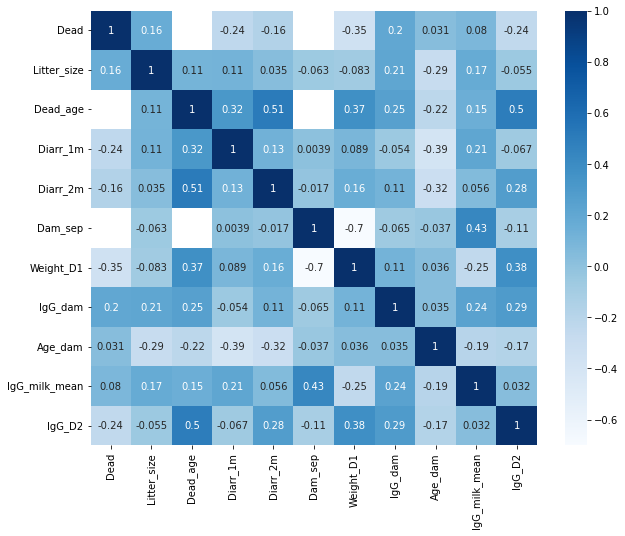

In [26]:
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()